- cnn -> convolutional neural network
- r cnn -> region-based convolutional neural network

- cnn -> image classification
- rcnn -> object detection task -> get location of object by generating boxes around them


- cnn -> classify into single cat (cat/dog)
- rcnn -> find the location of image and then detects it



In [ ]:
import cv2 # opencv
# perform processing and draw bounding boxes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# gives tools and models that can be trained to detect objects

In [ ]:
import kagglehub
# help to get great pretrained models to use in our projects etc
path=kagglehub.model_download("tensorflow/faster-rcnn-resnet-v1/tensorFlow2/faster-rcnn-resnet152-v1-640x640")
print("path to model files : ",path)


  0%|          | 0.00/242M [00:00<?, ?B/s]



  0%|          | 0.00/12.4M [00:00<?, ?B/s]




100%|██████████| 12.2k/12.2k [00:00<00:00, 14.1MB/s]


  8%|▊         | 1.00M/12.4M [00:00<00:01, 6.25MB/s]
  0%|          | 1.00M/242M [00:00<00:48, 5.19MB/s]

 48%|████▊     | 6.00M/12.4M [00:00<00:00, 26.7MB/s]
  3%|▎         | 7.00M/242M [00:00<00:08, 27.4MB/s]

100%|██████████| 12.4M/12.4M [00:00<00:00, 33.6MB/s]

  5%|▍         | 12.0M/242M [00:00<00:11, 21.3MB/s]
  8%|▊         | 20.0M/242M [00:00<00:08, 28.5MB/s]
 11%|█         | 27.0M/242M [00:01<00:08, 27.2MB/s]
 14%|█▎        | 33.0M/242M [00:01<00:06, 31.4MB/s]
 17%|█▋        | 41.0M/242M [00:01<00:08, 25.2MB/s]
 20%|██        | 49.0M/242M [00:01<00:07, 26.5MB/s]
 24%|██▎       | 57.0M/242M [00:02<00:07, 27.1MB/s]
 27%|██▋       | 65.0M/242M [00:02<00:07, 24.9MB/s]
 30%|███       | 73.0M/242M [00:02<00:06, 25.7MB/s]
 34%|███▎      | 81.0M/242M [00:03<00:06, 24.9MB/s]
 37%|███▋      | 89.0M/242M [00:03<00:05, 29.7MB/s]
 40%|████      | 97.0M/242M [00:03<00:04, 34.9MB/s]
 43%|████▎     | 105M/242M [00:03<00:03, 36.0MB/s] 


path to model files :  /root/.cache/kagglehub/models/tensorflow/faster-rcnn-resnet-v1/tensorFlow2/faster-rcnn-resnet152-v1-640x640/1


In [ ]:
# loading model into our env
model=tf.saved_model.load(r"/root/.cache/kagglehub/models/tensorflow/faster-rcnn-resnet-v1/tensorFlow2/faster-rcnn-resnet152-v1-640x640/1")

In [ ]:
# creating a function that will help us to read labels of the given data

def read_label_map(label_map_path):
# empty now but later updates id of each item
  item_id=None
  # empty now but laer updates item name
  item_name=None
  # creating empty wgivh will have id:name pair --> ex: 1: 'person',
  items={}


  with open(label_map_path,'r') as file:
    # help to read label map file line by line
    for line in file:
      # to examin each lin and extract id and names from it
      line.replace(" ","")
      # where ever we have spave we are removing it
      if line=="item{":
        # it will tell the start of an item block in the label map
        # it shows the start of new item
        pass
      elif line=="}":
        # end of block
        pass
      elif "id" in line:
        # check if that perticular line has id or not
        item_id= int(line.split(":",1)[1].strip())
        # extracting item id
      elif "display_name" in line:
        # name
        item_name=line.split(":", 1)[1].replace("'", "").replace('"','').strip()

      if item_id is not None and item_name is not None:
        # check if item id and name have been assigned value
        items[item_id]= item_name
        # dictionary
        # resetting the id and name after adding it into dictionary
        item_id=None
        item_name=None
  return items
  # returning dictionary

In [ ]:
class_names=read_label_map(r"/content/coco_classes.pbtxt")

In [ ]:
class_names

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [ ]:
txt = " banana "
x = txt.strip()
print(x)

banana


In [ ]:
img=cv2.imread(r"/content/img4.jpg")

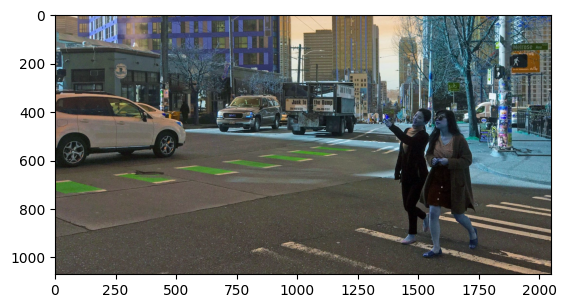

In [ ]:
plt.imshow(img)

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# bgr -> rgb
h,w,_=img.shape
input_tensor=np.expand_dims(img,0)
resp=model(input_tensor)
# traned model

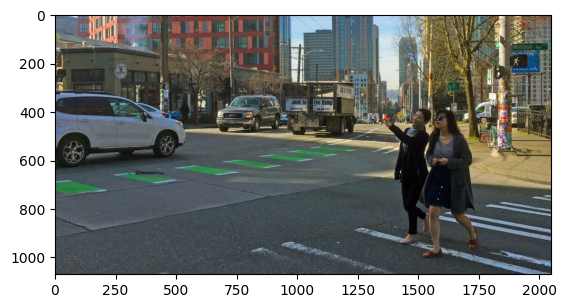

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
resp

{'raw_detection_scores': <tf.Tensor: shape=(1, 300, 91), dtype=float32, numpy=
 array([[[3.7747638e-03, 9.9605691e-01, 2.6164980e-06, ...,
          7.0507208e-06, 8.2442943e-07, 6.5734196e-07],
         [4.0285315e-04, 5.0773228e-06, 8.2637740e-07, ...,
          1.3736830e-07, 6.6143514e-08, 3.2660957e-08],
         [2.2400727e-03, 9.9768519e-01, 9.4150255e-07, ...,
          1.7961619e-06, 5.5821778e-07, 5.2397166e-07],
         ...,
         [9.9899012e-01, 8.1788485e-06, 9.6629637e-06, ...,
          1.3858933e-06, 1.6375475e-06, 5.1793813e-07],
         [9.9819106e-01, 3.7681879e-04, 2.7825963e-06, ...,
          4.8615709e-07, 3.7193388e-07, 2.3474203e-07],
         [9.9976426e-01, 1.5862988e-06, 1.1512817e-07, ...,
          1.4333180e-07, 1.4407591e-06, 8.8878465e-07]]], dtype=float32)>,
 'num_detections': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([300.], dtype=float32)>,
 'raw_detection_boxes': <tf.Tensor: shape=(1, 300, 4), dtype=float32, numpy=
 array([[[0.37180305

In [ ]:
resp['detection_boxes']

<tf.Tensor: shape=(1, 300, 4), dtype=float32, numpy=
array([[[0.35644796, 0.6615459 , 0.88665617, 0.7611107 ],
        [0.37180305, 0.7259139 , 0.9322974 , 0.8516905 ],
        [0.25045276, 0.46010166, 0.471817  , 0.6083365 ],
        ...,
        [0.6459901 , 0.73097676, 0.85435563, 0.7685708 ],
        [0.37775883, 0.64366555, 0.42506117, 0.65363425],
        [0.34528735, 0.8237963 , 0.4925493 , 0.98097956]]], dtype=float32)>

In [ ]:
# iterating over boxes, classes and scores
# zip -> accept more then 1 condition
# .numpy() tf tensors into numpy array
#astype(int) --> tensor -> arrray -> int format
#detection_boxes ---> contains the coordinates of the bounding boxes around the detected object
# detection_scores -> conficnce score of each object
# detection_classes-> item names for a particular id ex 1:person
for boxes, classes, scores in zip(resp['detection_boxes'].numpy(),resp['detection_classes'].numpy().astype(int),resp['detection_scores'].numpy()):
 # handle each detected object individually
  for box, cls, score in zip(boxes, classes, scores):
    # confidence score should be >0.5
    # to ensure  thatonly detections with resonable high confidence are taken
    if score>0.5:
      # box coordinates -> 0-1  --> pixel values based on image dimensions
      ymin=int(box[0]*h) # top edge of the box
      xmin=int(box[1]*w) # left edge
      ymax=int(box[2]*h) #bottom edge
      xmax=int(box[3]*w)# right edge

      cv2.putText(img, class_names[cls], (xmin,ymin - 10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
      # write the names above the box
      # img -> image
      # class_names[cls] -> detected object's name
      # (xmin,ymin - 10) -> where the text needs to be written --> top - left corner of the box
      # cv2.FONT_HERSHEY_SIMPLEX, --> font
      # 1 -> scale of font
      # (255,0,0),3 -> color rgb ---> 3 is thickness of text
      cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(128,0,128),4)
      # draw a rectangle
      # (xmin,ymin), --> top-left
      # xmax,ymax) --> bottom right
      #(128,0,128) --> rgb
      # 4 ---> thickness rect
      print(class_names[cls])
cv2.imwrite("output.png", cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

person
person
truck
car
car


True

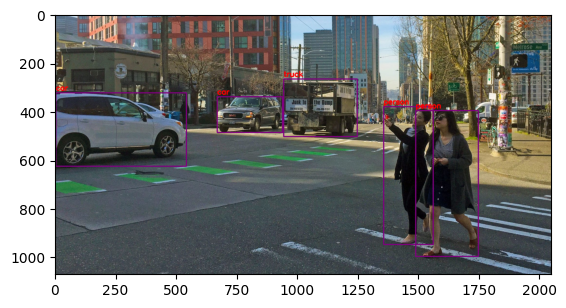

In [ ]:
plt.imshow(img)
plt.show()